In [2]:
from csv import DictReader
import collections
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import operator
import numpy as np

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

### Nesreče glede na spol

Procent moskih, ki so povzrocili nesreco: 0.6765211694373925 %
Procent žensk, ki so povzrocile nesreco: 0.3234788305626075 %


Text(0.5, 1.0, 'Stevilo povrocenih nesrec glede na spol povzrocitelja')

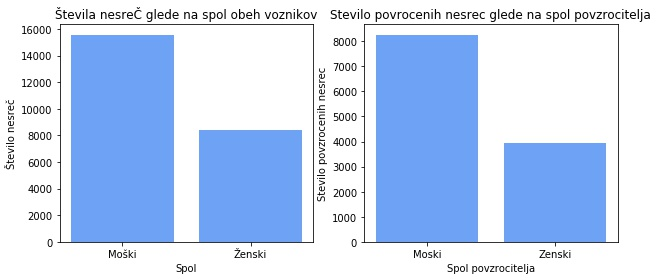

In [4]:
m, z = 0, 0
mP, zP = 0,0
m_z = []
mzP = []

for row in data:
    if(row["Spol"] == "MOSKI" and row["VrstaUdelezenca"] == 'VOZNIK OSEBNEGA AVTOMOBILA'):
        m += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ"):
            mP += 1
    elif (row["Spol"] == "ZENSKI" and row["VrstaUdelezenca"] == 'VOZNIK OSEBNEGA AVTOMOBILA'):
        z += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ"):
            zP += 1

m_z.append(m)
m_z.append(z)
mzP.append(mP)
mzP.append(zP)

print("Procent moskih, ki so povzrocili nesreco:", mP / (mP + zP), "%")
print("Procent žensk, ki so povzrocile nesreco:", zP / (mP + zP), "%")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(["Moški","Ženski"], m_z, color="#6ea2f5");
plt.xlabel("Spol")
plt.ylabel("Število nesreč")
plt.title("Števila nesreČ glede na spol obeh voznikov", fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(["Moski","Zenski"], mzP, color="#6ea2f5");
plt.xlabel("Spol povzrocitelja")
plt.ylabel("Stevilo povzrocenih nesrec")
plt.title("Stevilo povrocenih nesrec glede na spol povzrocitelja", fontsize=12)

## Vremenske razmere

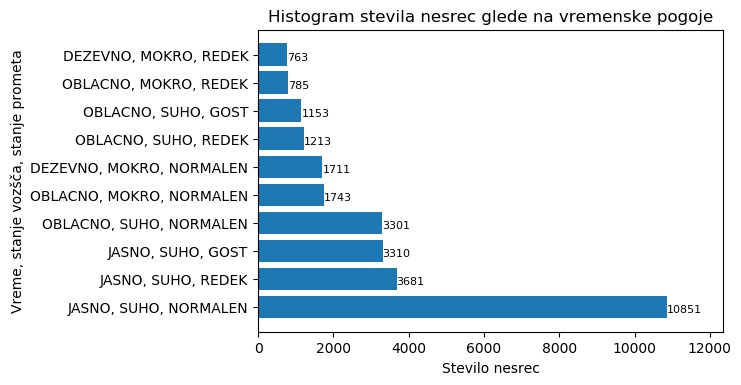

In [62]:
from collections import Counter 

st_nesrec_vreme = dict()
vsi_pogoji = ""

for row in data:
    vsi_pogoji += row["VremenskeOkoliscine"] + ", " + row["StanjeVozisca"]  + ", " + row["StanjePrometa"]
    if vsi_pogoji not in st_nesrec_vreme.keys():
        st_nesrec_vreme[vsi_pogoji] = 0
    st_nesrec_vreme[vsi_pogoji] += 1
    vsi_pogoji = ""

k = Counter(st_nesrec_vreme)  
high = k.most_common(10)

x = [i[0] for i in high]
y = [i[1] for i in high]

plt.figure(dpi = 100)
plt.barh(x, y);
plt.title('Histogram stevila nesrec glede na vremenske pogoje', fontsize=12);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Vreme, stanje vozšča, stanje prometa');
plt.xlim(0, y[0] + 1500)

for i, v in enumerate(y):
    plt.text(v, i- 0.20 , str(v), color="black", fontsize=8)

Tip nesreče: CELNO TRCENJE, verjetnost : 0.191
Tip nesreče: CELNO TRCENJE, verjetnost : 0.056
Tip nesreče: PREVRNITEV VOZILA, verjetnost : 0.183
Tip nesreče: PREVRNITEV VOZILA, verjetnost : 0.126
Tip nesreče: BOCNO TRCENJE, verjetnost : 0.166
Tip nesreče: BOCNO TRCENJE, verjetnost : 0.022
Tip nesreče: OSTALO, verjetnost : 0.126
Tip nesreče: OSTALO, verjetnost : 0.040
Tip nesreče: POVOZENJE PESCA, verjetnost : 0.119
Tip nesreče: POVOZENJE PESCA, verjetnost : 0.102
Tip nesreče: TRCENJE V OBJEKT, verjetnost : 0.107
Tip nesreče: TRCENJE V OBJEKT, verjetnost : 0.035
Tip nesreče: NALETNO TRCENJE, verjetnost : 0.057
Tip nesreče: NALETNO TRCENJE, verjetnost : 0.010
Tip nesreče: OPLAZENJE, verjetnost : 0.039
Tip nesreče: OPLAZENJE, verjetnost : 0.008
Tip nesreče: TRCENJE V STOJECE / PARKIRANO VOZILO, verjetnost : 0.010
Tip nesreče: TRCENJE V STOJECE / PARKIRANO VOZILO, verjetnost : 0.002
Tip nesreče: POVOZENJE ZIVALI, verjetnost : 0.002
Tip nesreče: POVOZENJE ZIVALI, verjetnost : 0.007


NameError: name 'pl' is not defined

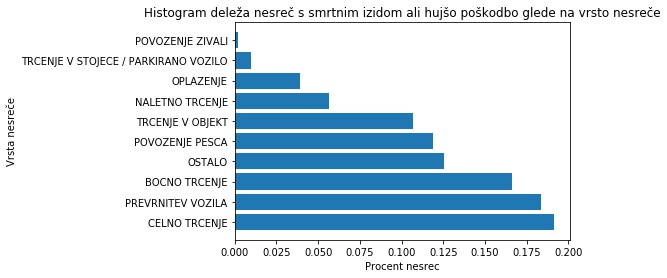

In [73]:
vsePoskodbe = 0
stevecPoskodb = {}
stevecNesrecTrcenje = {}

for row in data:
    if row["TipNesrece"] not in stevecNesrecTrcenje:
        stevecNesrecTrcenje[row["TipNesrece"]] = 1
    else:
        stevecNesrecTrcenje[row["TipNesrece"]] += 1
    
    if row["PoskodbaUdelezenca"] == "SMRT" or row["PoskodbaUdelezenca"] == "HUDA TELESNA POSKODBA":
        if row["TipNesrece"] not in stevecPoskodb.keys():
            stevecPoskodb[row["TipNesrece"]] = 0
        stevecPoskodb[row["TipNesrece"]] += 1
        vsePoskodbe += 1

k = Counter(stevecPoskodb)  
high = k.most_common(10)        
for i in high:
    print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / vsePoskodbe ))
    #print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / stevecNesrecTrcenje[i[0]] ))


plt.barh([i[0] for i in high],[i[1]/vsePoskodbe for i in high])
plt.title('Histogram deleža nesreč s smrtnim izidom ali hujšo poškodbo glede na vrsto nesreče', fontsize=12);

plt.xlabel('Procent nesrec');
plt.ylabel('Vrsta nesreče');



# BAYES

In [44]:
#Stevilo poskodb ce se je celno butnu
stevecPoskodb = {
    'BREZ POSKODBE': 0,
    'LAZJA TELESNA POSKODBA': 0,
    'HUDA TELESNA POSKODBA': 0,
    'SMRT': 0
}
stevecCelniTrcenj = {
    "celnoBrez": 0,
    "celnoLazja": 0,
    "celnoHuda": 0,
    "celnoSmrt":0
}
cntP = 0
cntC = 0

for row in data:
    if row["PoskodbaUdelezenca"] in stevecPoskodb.keys():
        stevecPoskodb[row["PoskodbaUdelezenca"]] += 1
        cntP += 1
        if row["TipNesrece"] == 'CELNO TRCENJE':
            if row["PoskodbaUdelezenca"] == 'BREZ POSKODBE':
                stevecCelniTrcenj["celnoBrez"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'HUDA TELESNA POSKODBA':
                stevecCelniTrcenj["celnoHuda"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'LAZJA TELESNA POSKODBA':
                stevecCelniTrcenj["celnoLazja"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'SMRT':
                stevecCelniTrcenj["celnoSmrt"] += 1
                cntC += 1
    
for poskodbe, trcenje in zip(stevecPoskodb.items(), stevecCelniTrcenj.values()):
    key, value = poskodbe
    x = value / cntP
    y = cntC / cntP
    yx = trcenje / value
    xy = (yx * x) / y
    print("P(X=%s | Y=%s): %f" % (key, "Čelno trčenje", xy))

P(X=BREZ POSKODBE | Y=Čelno trčenje): 0.595779
P(X=LAZJA TELESNA POSKODBA | Y=Čelno trčenje): 0.347403
P(X=HUDA TELESNA POSKODBA | Y=Čelno trčenje): 0.048377
P(X=SMRT | Y=Čelno trčenje): 0.008442
